In [1]:
import warnings
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
import squarify
from shapely.geometry import Point, Polygon
warnings.filterwarnings("ignore")
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter


In [2]:
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("C:\\Users\\dell\\Documents\\Python\\Myprojects\\project1\\Datasets\\raw_dataset\\DataCoSupplyChainDataset.csv", encoding='latin1')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [23]:
df.tail(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180509,PAYMENT,3,4,0.000000,335.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Melissa,7,Wilcox,XXXXXXXXX,Corporate,PR,9453 High Concession,725.0,7,Fan Shop,18.359095,-66.079956,Pacific Asia,Guangshui,China,7,1/16/2016 6:49,26052,1004,64.0,0.16,65202,399.980011,0.00,1,399.980011,335.980011,0.000000,Eastern Asia,Hubei,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180510,PAYMENT,3,4,165.990005,331.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Melissa,7,Wilcox,XXXXXXXXX,Corporate,PR,9453 High Concession,725.0,7,Fan Shop,18.359095,-66.079956,Pacific Asia,Guangshui,China,7,1/16/2016 6:49,26052,1004,68.0,0.17,65201,399.980011,0.50,1,399.980011,331.980011,165.990005,Eastern Asia,Hubei,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,EE. UU.,XXXXXXXXX,Olivia,9314,Smith,XXXXXXXXX,Consumer,CA,3760 Stony Promenade,91911.0,7,Fan Shop,32.611141,-117.073662,Pacific Asia,Chengdu,China,9314,1/16/2016 6:28,26051,1004,72.0,0.18,65195,399.980011,0.48,1,399.980011,327.980011,157.429993,Eastern Asia,Sichuan,ON_HOLD,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 6:28,Second Class
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,7396,Madden,XXXXXXXXX,Home Office,PR,9918 Lazy Cape,725.0,7,Fan Shop,18.245256,-66.370621,Pacific Asia,Chengdu,China,7396,1/16/2016 6:07,26050,1004,80.0,0.20,65194,399.980011,0.27,1,399.980011,319.980011,86.400002,Eastern Asia,Sichuan,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class
180513,PAYMENT,3,4,119.989998,299.989990,Advance shipping,0,45,Fishing,Lancaster,EE. UU.,XXXXXXXXX,Mary,3080,Smith,XXXXXXXXX,Home Office,OH,8600 Red Goose Abbey,43130.0,7,Fan Shop,39.715977,-82.599297,Pacific Asia,Shanghái,China,3080,1/16/2016 5:04,26047,1004,100.0,0.25,65185,399.980011,0.40,1,399.980011,299.989990,119.989998,Eastern Asia,Shanghái,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 5:04,Standard Class
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,914

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [25]:
df.describe(include='all')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519,180519,180519.000000,180511,180519,180519,180519,180519,180516.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519,180519,24840.000000,180519.000000,180519.000000,0.0,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,2,1,782,NaN,1109,1,3,46,7458,NaN,NaN,11,NaN,NaN,5,3597,164,NaN,65752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1089,9,NaN,NaN,NaN,NaN,118,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,NaN,Smith,XXXXXXXXX,Consumer,PR,9126 Wishing Expressway,NaN,NaN,Fan Shop,NaN,NaN,LATAM,Santo Domingo,Estados Unidos,NaN,12/14/2016 12:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,NaN,NaN,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,1/5/2016 5:58,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,111146,180519,65150,NaN,64104,180519,93504,69373,122,NaN,NaN,66861,NaN,NaN,51594,2211,24840,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28341,6722,59491,NaN,NaN,NaN,NaN,24515,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,NaN,NaN,NaN,6691.379495,NaN,NaN,NaN,NaN,NaN,35921.126914,5.443460,NaN,29.719955,-84.915675,NaN,NaN,NaN,6691.379495,NaN,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,NaN,NaN,NaN,55426.132327,692.509764,31.851451,NaN,NaN,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,NaN,NaN,NaN,4162.918106,NaN,NaN,NaN,NaN,NaN,37542.461122,1.629246,NaN,9.813646,21.433241,NaN,NaN,NaN,4162.918106,NaN,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,NaN,NaN,NaN,31919.279101,336.446807,15.640064,NaN,NaN,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,603.000000,2.000000,NaN,-33.937553,-158.025986,NaN,NaN,NaN,1.000000,NaN,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,NaN,NaN,NaN,1040.000000,19.000000,2.000000,NaN,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,3258.500000,NaN,NaN,NaN,NaN,NaN,725.000000,4.000000,NaN,18.265432,-98.446312,NaN,NaN,NaN,3258.500000,NaN,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,NaN,NaN,NaN,23464.000000,403.000000,18.000000,NaN,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,NaN,NaN,NaN,6457.000000,NaN,NaN,NaN,NaN,Na

Dropping Unnecessary columns, containing missing data

In [5]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Droping columns which are not required and PII Alert - So Droping sensitive columns

In [6]:
df.drop(columns=[
    "Product Description",
    "Product Card Id",
    "Product Category Id",
    "Product Image",
    "Product Status",
    "Order Zipcode",
    "Order Customer Id",
    "Order Id",
    "Order Item Cardprod Id",
    "Order Item Id",
    "Department Id",
    "Customer Id",
    "Customer Fname",
    "Customer Lname",
    "Customer Email",
    "Customer Password",
    "Customer Zipcode",
    "Category Id"
], inplace = True,)

Change the Date-Columns to the appropriate format

In [7]:
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df["shipping date (DateOrder)"] = pd.to_datetime(df["shipping date (DateOrders)"])
df["Year"] = df["order date (DateOrders)"].dt.year

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Segment               180519 non-null  object        
 11  

In [8]:
df.isnull().sum().any()

False

In [37]:
df.duplicated().any()

False

In [9]:
# Loop through all columns with object datatype and print their value counts
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))  # Show top 10 values for each



Column: Type
Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

Column: Delivery Status
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Column: Category Name
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: count, dtype: int64

Column: Customer City
Customer City
Caguas          66770
Chicago          3885
Los Angeles      3417
Brooklyn         3412
New York         1816
Philadelphia     1577
Bronx            1500
San Diego        1437
Miami            1314
Houston          1297
Name: count, dtype: int64

Column: Customer Country
Customer Country
EE. UU.        1111

In [39]:
# Print number of unique values for each object dtype column
for col in df.select_dtypes(include='object').columns:
    num_unique = df[col].nunique(dropna=False)
    print(f"{col}: {num_unique} unique values")


Type: 4 unique values
Delivery Status: 4 unique values
Category Name: 50 unique values
Customer City: 563 unique values
Customer Country: 2 unique values
Customer Segment: 3 unique values
Customer State: 46 unique values
Customer Street: 7458 unique values
Department Name: 11 unique values
Market: 5 unique values
Order City: 3597 unique values
Order Country: 164 unique values
Order Region: 23 unique values
Order State: 1089 unique values
Order Status: 9 unique values
Product Name: 118 unique values
shipping date (DateOrders): 63701 unique values
Shipping Mode: 4 unique values


In [40]:
print(df["order date (DateOrders)"].min(), df["order date (DateOrders)"].max())

2015-01-01 00:00:00 2018-01-31 23:38:00


In [10]:
market_sales = df.groupby("Market")["Sales"].sum().sort_values(ascending=False).reset_index()
department_sales =( df.groupby("Department Name", observed = False)["Sales"].sum().sort_values(ascending=True).reset_index())

In [11]:
print(market_sales)

         Market         Sales
0        Europe  1.087240e+07
1         LATAM  1.027761e+07
2  Pacific Asia  8.273744e+06
3          USCA  5.066529e+06
4        Africa  2.294453e+06


In [14]:
print(department_sales)

       Department Name         Sales
0            Book Shop  1.258740e+04
1             Pet Shop  4.152480e+04
2   Health and Beauty   1.060805e+05
3           Discs Shop  2.288877e+05
4              Fitness  3.970509e+05
5           Technology  1.039599e+06
6             Outdoors  1.253351e+06
7             Footwear  4.006499e+06
8                 Golf  4.609028e+06
9              Apparel  7.976255e+06
10            Fan Shop  1.711387e+07


Get the top markets and departments

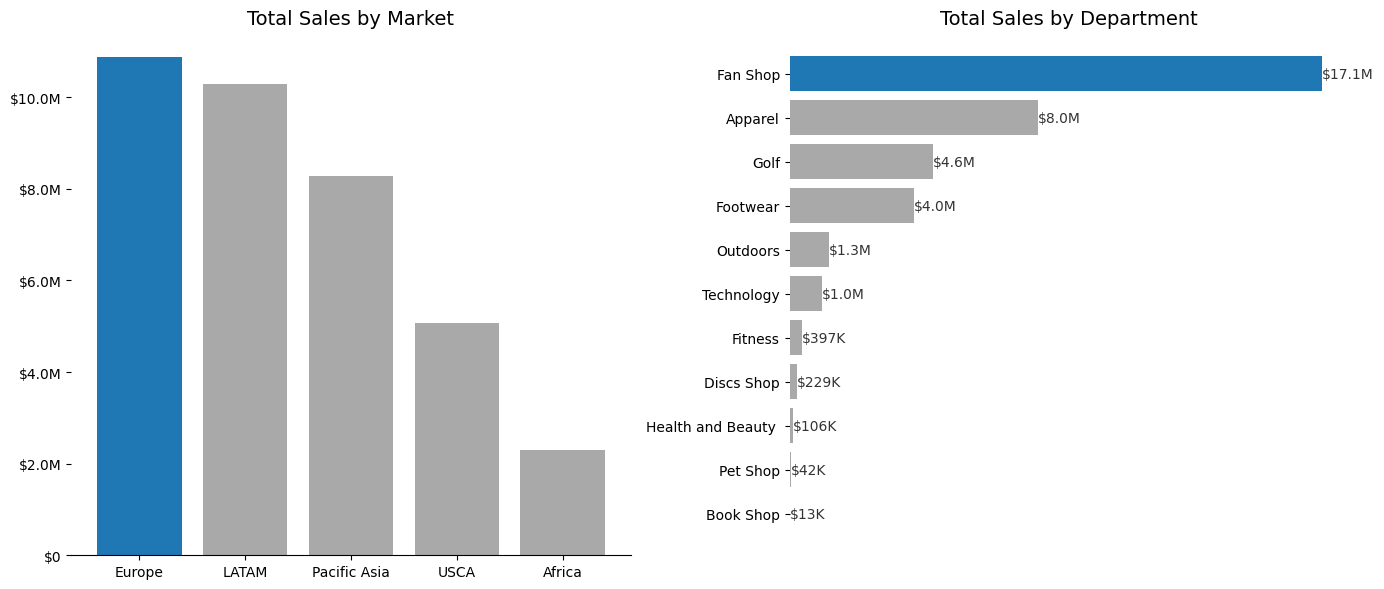

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Group and aggregate
market_sales = df.groupby("Market")["Sales"].sum().sort_values(ascending=False)
department_sales = df.groupby("Department Name")["Sales"].sum().sort_values(ascending=True)

# 2. Extract top market and department dynamically
top_markets = dict(market_sales.head(1))  # top 1 market as dict
top_department = department_sales.idxmax()  # top department name

# 3. Define currency formatting function
def currency_formatter(x, pos):
    if x >= 1e9:
        return "${:,.1f}B".format(x / 1e9)
    elif x >= 1e6:
        return "${:,.1f}M".format(x / 1e6)
    elif x >= 1e3:
        return "${:,.0f}K".format(x / 1e3)
    else:
        return "${:,.0f}".format(x)

# 4. Set up plot with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 5. Plot market sales (vertical bars)
for market, sales in market_sales.items():
    color = "tab:blue" if market in top_markets else "darkgrey"
    ax[0].bar(market, sales, color=color)

ax[0].set_title("Total Sales by Market", fontsize=14)
ax[0].yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# 6. Plot department sales (horizontal bars)
for department, sales in department_sales.items():
    color = "tab:blue" if department == top_department else "darkgrey"
    ax[1].barh(department, sales, color=color)
    ax[1].text(
        sales,
        department,
        currency_formatter(sales, None),
        va="center",
        ha="left",
        color="black",
        alpha=0.8,
    )

ax[1].set_title("Total Sales by Department", fontsize=14)
ax[1].xaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax[1].spines["bottom"].set_visible(False)
ax[1].xaxis.set_visible(False)

# 7. General formatting for both plots
for axes in ax:
    axes.spines[["top", "right", "left"]].set_visible(False)
    axes.set_axisbelow(True)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()
